In [156]:
import pandas as pd

df = pd.read_csv('../data/derived_variables.csv')
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             26457 non-null  object 
 1   age_group          26457 non-null  int64  
 2   child_num          26457 non-null  int64  
 3   income_total       26457 non-null  float64
 4   asset              26457 non-null  int64  
 5   edu_type           26457 non-null  object 
 6   house_type         26457 non-null  object 
 7   occyp_type         26457 non-null  object 
 8   income_stability   26457 non-null  int64  
 9   email              26457 non-null  int64  
 10  work_phone         26457 non-null  int64  
 11  family_type        26457 non-null  object 
 12  family_size        26457 non-null  float64
 13  emp_years          26457 non-null  int64  
 14  income_per_capita  26457 non-null  float64
 15  hold_period        26457 non-null  float64
 16  credit             264

In [157]:
def label(list, c):
    return list.index(c)

## Gender
* Male = 0
* Female = 1

In [158]:
genders = list(df['gender'].unique())
df['gender'] = [ label(genders, g) for g in df['gender'] ]

## edu_type
* Higher education : 0
* Secondary / secondary special : 1
* Incomplete higher : 2
* Lower secondary : 3
* Academic degree : 4

In [159]:
edu = list(df['edu_type'].unique())
df['edu_type'] = [ label(edu, g) for g in df['edu_type'] ]

## house_type
* Municipal apartment : 0
* House / apartment : 1
* With parents : 2
* Co-op apartment : 3
* Rented apartment : 4
* Office apartment : 5

In [160]:
house = list(df['house_type'].unique())
df['house_type'] = [ label(house, g) for g in df['house_type'] ]

## family_type
* Married : 0
* Civil marriage : 1
* Separated : 2
* Single / not married : 3
* Widow : 4

In [161]:
family = list(df['family_type'].unique())
df['family_type'] = [ label(family, g) for g in df['family_type'] ]

In [162]:
occyp = list(df['occyp_type'].unique())
df['occyp_type'] = [ label(occyp, g) for g in df['occyp_type'] ]

## income_total

In [163]:
import matplotlib.pyplot as plt

df['income_total'].describe()

count    2.645700e+04
mean     1.873065e+05
std      1.018784e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income_total, dtype: float64

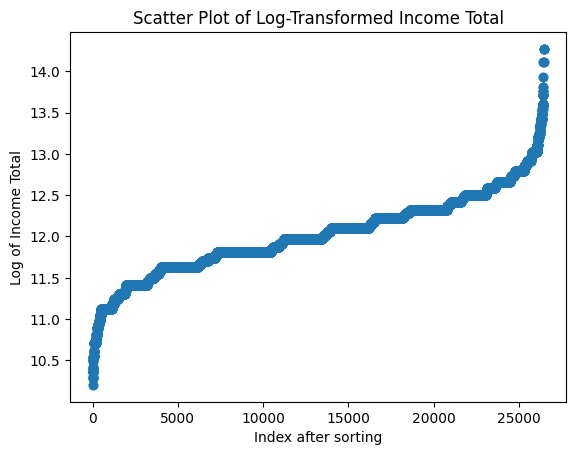

In [164]:
import matplotlib.pyplot as plt
import numpy as np

sorted_income = df['income_total'].sort_values()
idx = list(range(len(sorted_income)))
log_income = np.log(sorted_income)

# 산점도 그리기
plt.scatter(idx, log_income)
plt.xlabel('Index after sorting')
plt.ylabel('Log of Income Total')
plt.title('Scatter Plot of Log-Transformed Income Total')
plt.show()

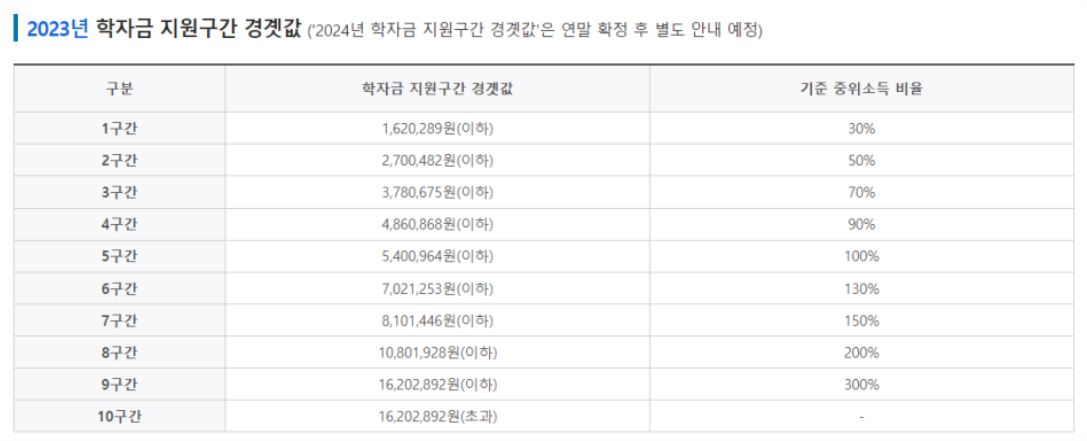

In [165]:
median_index = int(len(df['income_total']) / 2)
sorted_income = df['income_total'].sort_values()
median_income = sorted_income.iloc[median_index]

income_standard = [0.3, 0.5, 0.7, 0.9, 1, 1.3, 1.5, 2, 3]
income_standard = [ x * median_income for x in income_standard ]

income_standard

[47250.0,
 78750.0,
 110250.0,
 141750.0,
 157500.0,
 204750.0,
 236250.0,
 315000.0,
 472500.0]

In [166]:
def label_income(income):
    if income >= 472500:
        return 10
    for i in range(len(income_standard) - 1):
        if income >= income_standard[i] and income < income_standard[i + 1]:
            return i + 1
    return 1

In [167]:
df['income_total_label'] = [ label_income(x) for x in df['income_total'] ]

In [168]:
df['income_total_label'].value_counts()

income_total_label
5     6985
3     6579
7     2806
6     2719
2     2490
8     2350
1     1508
4      626
10     394
Name: count, dtype: int64

In [169]:
df['income_per_capita_label'] = (df['income_total_label'] / df['family_size'])
df.head()

,gender,age_group,child_num,income_total,asset,edu_type,house_type,occyp_type,income_stability,email,work_phone,family_type,family_size,emp_years,income_per_capita,hold_period,credit,income_total_label,income_per_capita_label
0,0,30,0,202500.0,0,0,0,0,2,0,0,0,2.0,12,101250.0,6.0,1.0,5,2.500000
1,0,30,1,247500.0,1,1,1,1,3,1,0,1,3.0,4,82500.0,5.0,1.0,7,2.333333
2,1,50,0,450000.0,2,0,1,2,1,0,0,0,2.0,12,225000.0,22.0,2.0,8,4.000000
3,0,40,0,202500.0,1,1,1,3,2,0,0,0,2.0,5,101250.0,37.0,0.0,5,2.500000
4,0,40,0,157500.0,2,0,1,2,1,0,0,0,2.0,5,78750.0,26.0,2.0,5,2.500000


In [170]:
df.to_csv('../data/data_labeled.csv')